# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import dataset

In [3]:
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reactionTypes = pd.read_csv('ReactionTypes.csv')

# prepare and clean data

In [4]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
# drop 'Unnamed: 0' column
content.drop(columns='Unnamed: 0', axis=1, inplace=True)
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [6]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [7]:
# drop 'Unnamed: 0' column
reactions.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactions.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [8]:
reactionTypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [9]:
# drop 'Unnamed: 0' column
reactionTypes.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactionTypes.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [10]:
# check content DataFram information about white spaces in columns name or null values ot data types
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


In [11]:
# check duplicated values
content.duplicated().sum()

0

In [12]:
# drop null values
# check are there other null
content.dropna(inplace=True)
content.isnull().sum()

Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64

In [13]:
# check data validity by unique values
content.select_dtypes(include='object').nunique()

Content ID    801
User ID       408
Type            4
Category       17
URL           801
dtype: int64

In [14]:
content['Type'].unique()

array(['photo', 'video', 'audio', 'GIF'], dtype=object)

In [15]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'dogs',
       'soccer', 'public speaking', 'tennis', 'travel', 'education',
       'studying', 'science', 'veganism', 'cooking', 'animals', 'fitness',
       'culture'], dtype=object)

In [16]:
# check reactions DataFram information about white spaces in columns name or null values ot data types
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 798.7+ KB


In [17]:
reactions.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [18]:
# convert 'Datetime' column to datetime type
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])
reactions['Datetime']

0       2021-04-22 15:17:15
1       2020-11-07 09:43:50
2       2021-06-17 12:22:51
3       2021-04-18 05:13:58
4       2021-01-06 19:13:01
                ...        
25548   2020-06-27 09:46:48
25549   2021-02-16 17:17:02
25550   2020-09-12 03:54:58
25551   2020-11-04 20:08:31
25552   2021-01-04 04:55:11
Name: Datetime, Length: 25553, dtype: datetime64[ns]

In [19]:
# check duplicated values
reactions.duplicated().sum()

0

In [20]:
# check data validity by unique values
reactions.select_dtypes(include='object').nunique()

Content ID    980
User ID       500
Type           16
dtype: int64

In [21]:
reactions['Type'].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [22]:
# drop null values
# check are there other null
reactions.dropna(inplace=True)
reactions.isnull().sum()

Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [23]:
# check reactionTypes DataFram information about white spaces in columns name or null values ot data types
reactionTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [24]:
# check duplicated values
reactionTypes.duplicated().sum()

0

In [25]:
# check data validity by unique values
reactionTypes.select_dtypes(include='object').nunique()

Type         16
Sentiment     3
dtype: int64

In [26]:
reactionTypes['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [27]:
reactionTypes['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [28]:
# check : are the values of 'Type' column in 'reactions' df equal values of 'Type' column in 'reactionTypes' df?
for x in reactions['Type'].unique() :
    if x in reactionTypes['Type'].unique() :
        print('True')
    else :
        print('False')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [29]:
df = pd.merge(left=content, right=reactions, how='outer', on='Type')
df

,Content ID_x,User ID_x,Type,Category,URL,Content ID_y,User ID_y,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,NaN,NaN,NaT
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...,NaN,NaN,NaT
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...,NaN,NaN,NaT
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...,NaN,NaN,NaT
4,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...
23330,NaN,NaN,adore,NaN,NaN,435007a5-6261-4d8b-b0a4-55fdc189754b,d51a3403-8bab-4d88-af4f-a429c6d8c168,2020-10-04 22:26:33
23331,NaN,NaN,adore,NaN,NaN,435007a5-6261-4d8b-b0a4-55fdc189754b,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,2020-09-18 10:50:50
23332,NaN,NaN,adore,NaN,NaN,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,89572273-761e-46f3-8b99-1689d98aac90,2020-10-31 03:58:44
23333,NaN,NaN,adore,NaN,NaN,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,2020-06-25 15:12:29


In [30]:
df = pd.merge(left=reactionTypes, right=df, how='inner', on='Type')
df

,Type,Sentiment,Score,Content ID_x,User ID_x,Category,URL,Content ID_y,User ID_y,Datetime
0,heart,positive,60,NaN,NaN,NaN,NaN,97522e57-d9ab-4bd6-97bf-c24d952602d2,0a1cde57-79ab-4c61-b664-1d3b290b43cf,2021-04-11 14:29:59
1,heart,positive,60,NaN,NaN,NaN,NaN,9f737e0a-3cdd-4d29-9d24-753f4e3be810,91fa7240-3d29-4dd0-baf1-ace7742a6e3f,2021-06-16 03:02:28
2,heart,positive,60,NaN,NaN,NaN,NaN,230c4e4d-70c3-461d-b42c-ec09396efb3f,54a8e072-5369-4122-9189-43b55e1a4ba2,2020-12-25 00:09:41
3,heart,positive,60,NaN,NaN,NaN,NaN,230c4e4d-70c3-461d-b42c-ec09396efb3f,b76ebf8d-3f04-4e7f-aec8-22575f68d9e2,2020-06-21 16:57:09
4,heart,positive,60,NaN,NaN,NaN,NaN,230c4e4d-70c3-461d-b42c-ec09396efb3f,31d378e7-9e95-4e8a-b564-7fd346027dfe,2021-05-14 12:47:27
...,...,...,...,...,...,...,...,...,...,...
22529,worried,negative,12,NaN,NaN,NaN,NaN,c54b49c4-b1f2-4641-8595-1cbd19937845,9e9cf8e7-6731-47da-bc0f-3a487e835586,2021-01-15 13:14:10
22530,worried,negative,12,NaN,NaN,NaN,NaN,c54b49c4-b1f2-4641-8595-1cbd19937845,aab5b5d2-682b-4b27-89ae-cf7803f76786,2021-04-13 20:07:18
22531,worried,negative,12,NaN,NaN,NaN,NaN,435007a5-6261-4d8b-b0a4-55fdc189754b,7240bf9b-7424-4c04-aab1-1d7aa39964d9,2021-04-23 11:38:11
22532,worried,negative,12,NaN,NaN,NaN,NaN,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,2020-10-31 04:50:14


In [31]:
df.drop(columns=['Content ID_x', 'User ID_x', 'Category', 'URL', 'Content ID_y', 'User ID_y'], axis=1, inplace=True)
df

,Type,Sentiment,Score,Datetime
0,heart,positive,60,2021-04-11 14:29:59
1,heart,positive,60,2021-06-16 03:02:28
2,heart,positive,60,2020-12-25 00:09:41
3,heart,positive,60,2020-06-21 16:57:09
4,heart,positive,60,2021-05-14 12:47:27
...,...,...,...,...
22529,worried,negative,12,2021-01-15 13:14:10
22530,worried,negative,12,2021-04-13 20:07:18
22531,worried,negative,12,2021-04-23 11:38:11
22532,worried,negative,12,2020-10-31 04:50:14


In [32]:
df['Sentiment'].value_counts().sort_values(ascending=False)

positive    12674
negative     7037
neutral      2823
Name: Sentiment, dtype: int64

<Axes: >

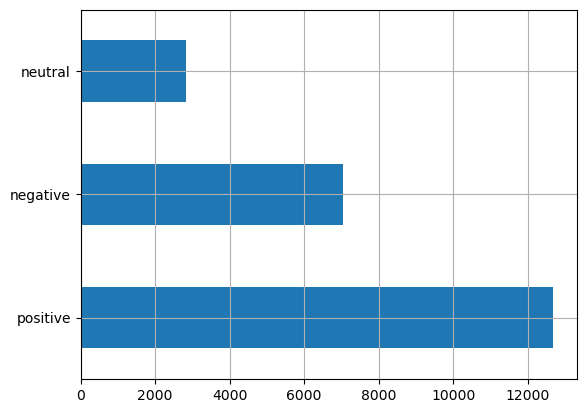

In [33]:
df['Sentiment'].value_counts().sort_values(ascending=False).plot(kind='barh', grid=True)

In [34]:
df['Type'].value_counts().sort_values(ascending=False)

heart          1497
peeking        1438
scared         1436
adore          1427
interested     1425
hate           1420
love           1411
disgust        1406
want           1396
dislike        1396
super love     1393
like           1391
indifferent    1385
cherish        1380
worried        1379
intrigued      1354
Name: Type, dtype: int64

<Axes: >

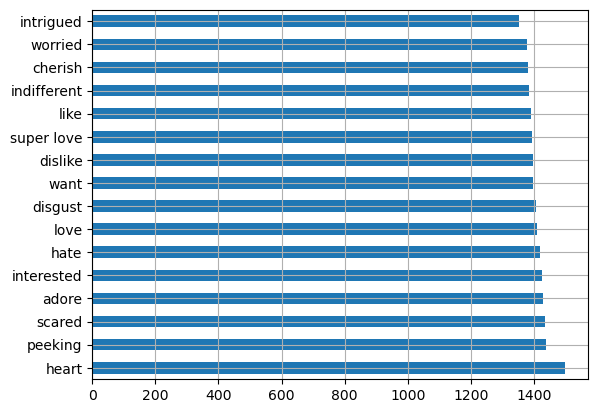

In [35]:
df['Type'].value_counts().sort_values(ascending=False).plot(kind='barh', grid=True)

In [36]:
df[df['Type']=='heart'].groupby('Datetime').agg('count')['Type']

Datetime
2020-06-18 12:18:44    1
2020-06-18 15:57:31    1
2020-06-18 21:13:23    1
2020-06-18 23:39:29    1
2020-06-19 14:59:00    1
                      ..
2021-06-17 05:57:19    1
2021-06-17 10:09:51    1
2021-06-17 11:52:58    1
2021-06-17 12:50:45    1
2021-06-17 16:34:32    1
Name: Type, Length: 1497, dtype: int64

In [37]:
df['year'] = df['Datetime'].dt.year
df['year']

0        2021
1        2021
2        2020
3        2020
4        2021
         ... 
22529    2021
22530    2021
22531    2021
22532    2020
22533    2020
Name: year, Length: 22534, dtype: int64

In [38]:
df[df['Type']=='heart'].groupby('year').agg('count')['Type']

year
2020    797
2021    700
Name: Type, dtype: int64

<Axes: ylabel='year'>

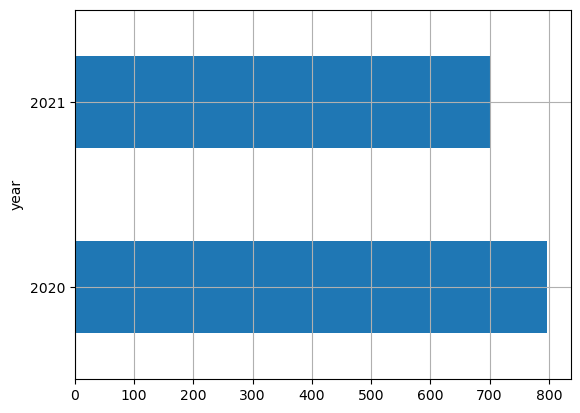

In [39]:
df[df['Type']=='heart'].groupby('year').agg('count')['Type'].plot(kind='barh', grid=True)

In [40]:
df['month'] = df['Datetime'].dt.month
df['month']

0         4
1         6
2        12
3         6
4         5
         ..
22529     1
22530     4
22531     4
22532    10
22533    11
Name: month, Length: 22534, dtype: int64

In [41]:
df[df['Type']=='heart'].groupby(['year', 'month']).agg('count')['Type']

year  month
2020  6         49
      7        121
      8        123
      9        142
      10       104
      11       140
      12       118
2021  1        132
      2        118
      3        112
      4        122
      5        144
      6         72
Name: Type, dtype: int64

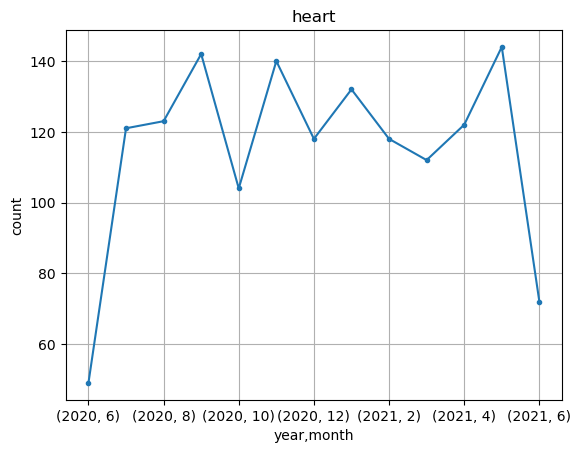

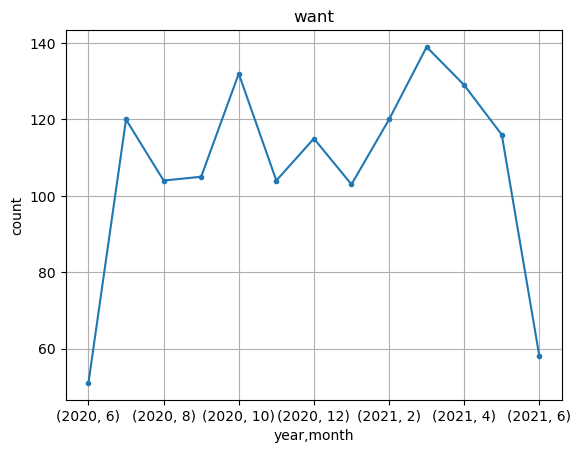

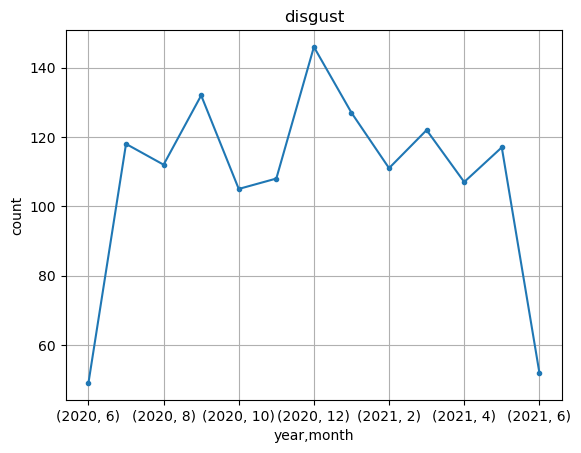

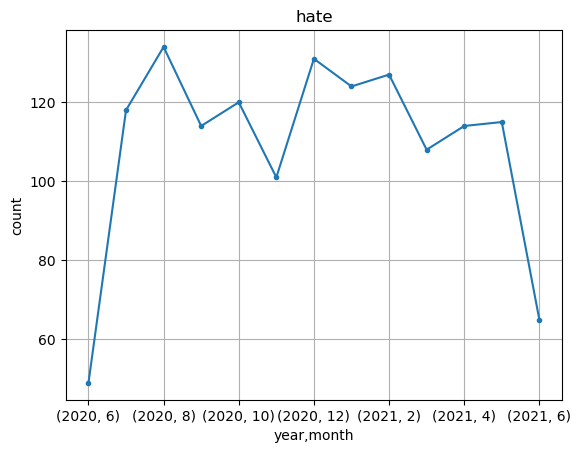

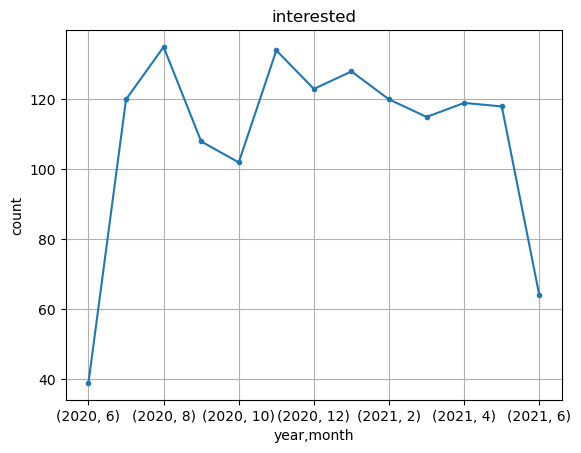

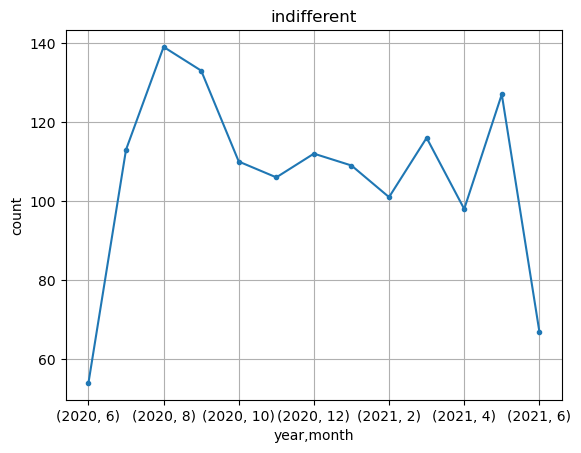

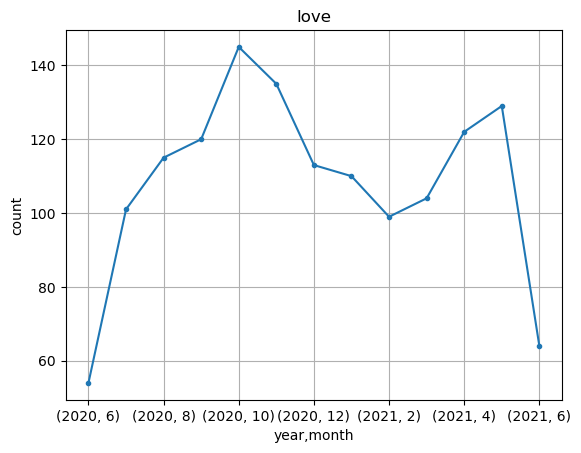

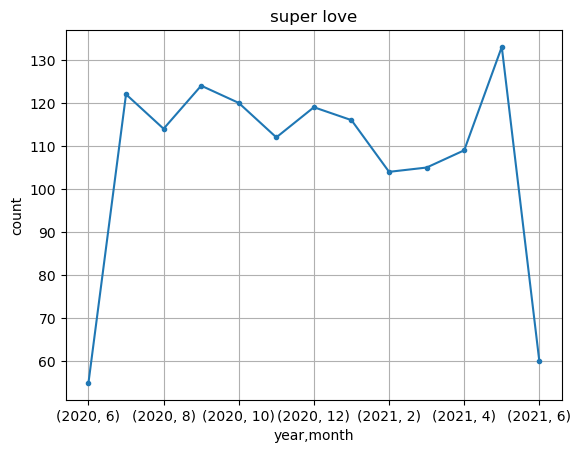

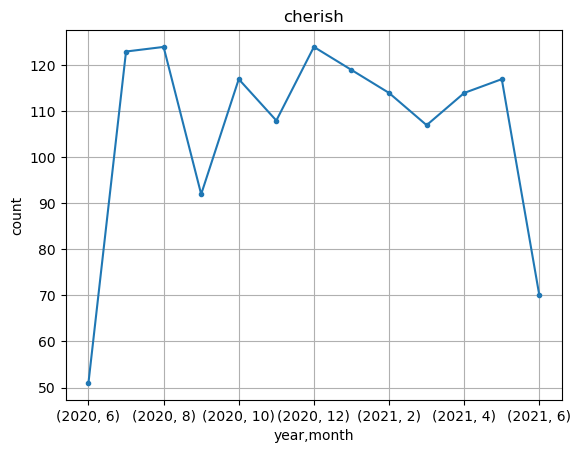

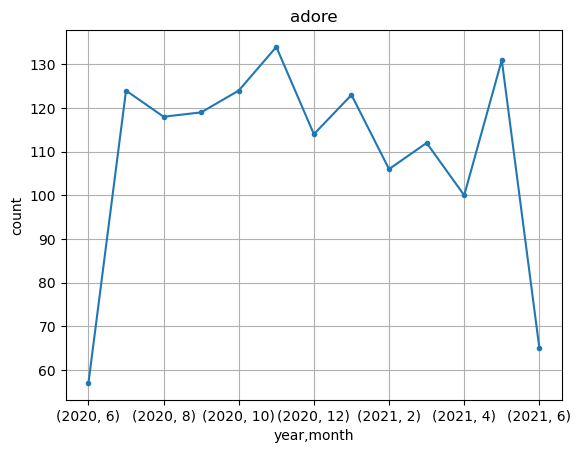

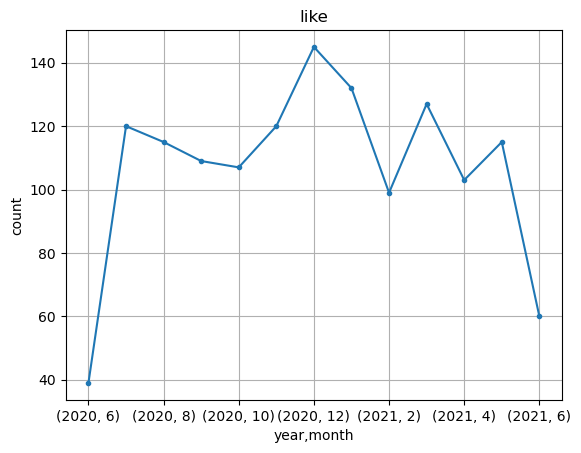

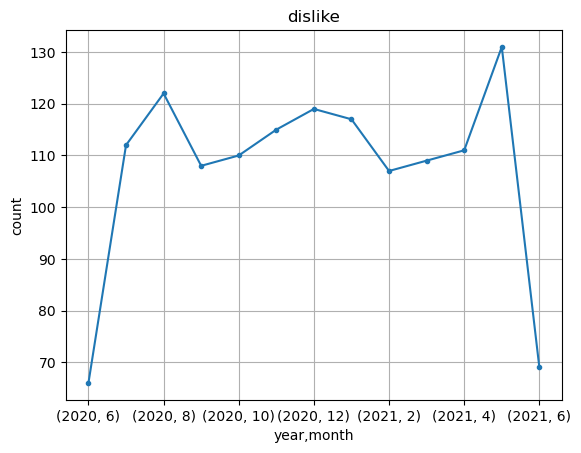

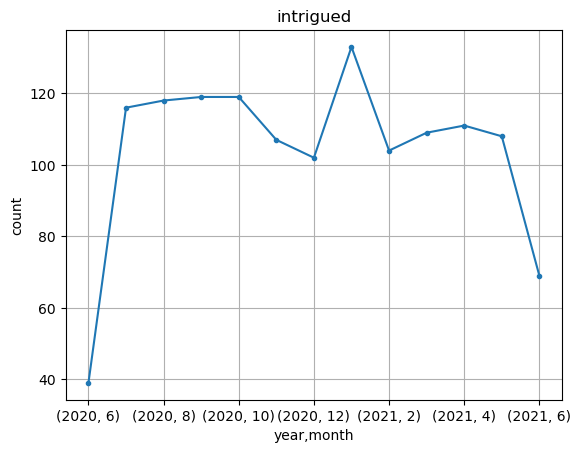

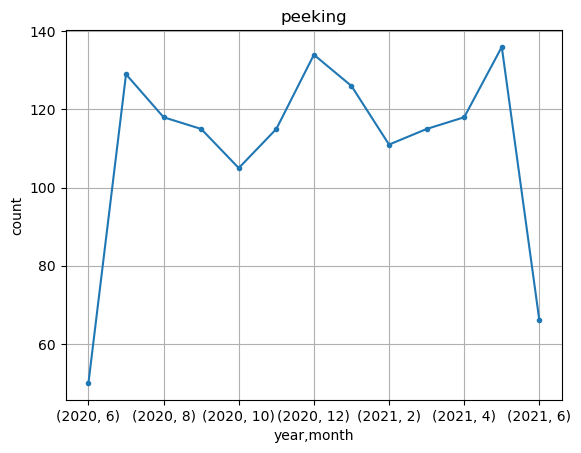

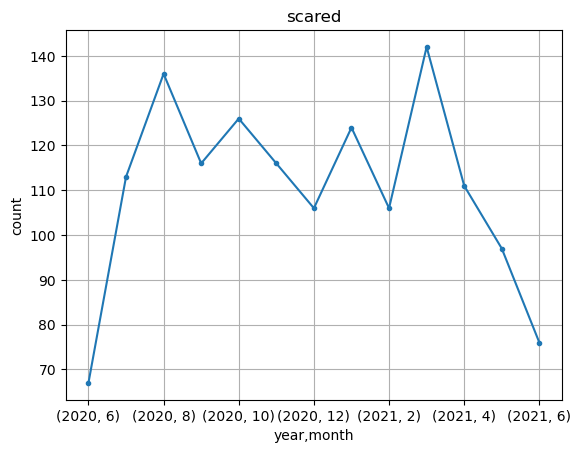

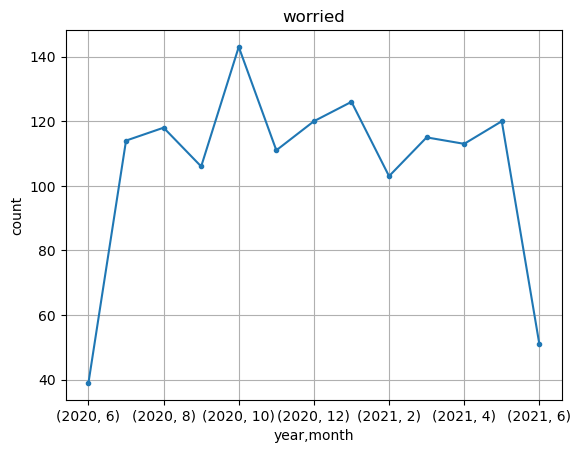

In [42]:
for x in df['Type'].unique() :
    (df[df['Type']==x].groupby(['year','month']).agg('count')['Type']).plot(grid=True, title=x, ylabel='count', marker='.')
    plt.show()

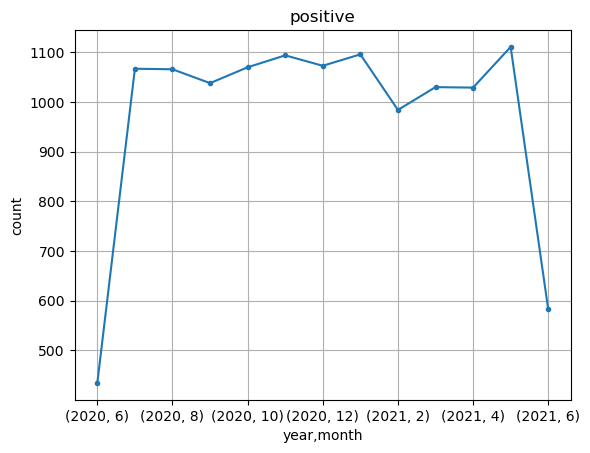

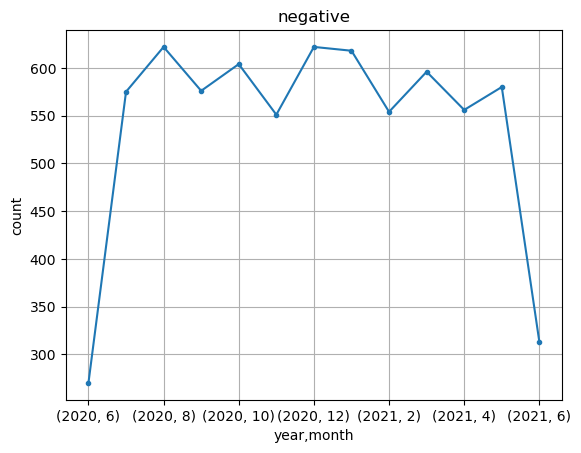

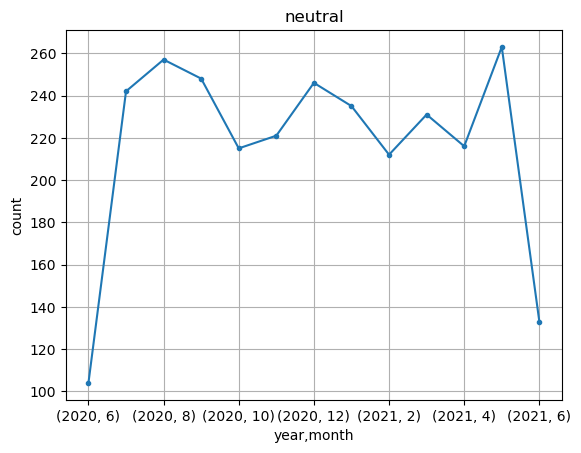

In [43]:
for x in df['Sentiment'].unique() :
    (df[df['Sentiment']==x].groupby(['year','month']).agg('count')['Sentiment']).plot(grid=True, title=x, ylabel='count', marker='.')
    plt.show()